<a href="https://colab.research.google.com/github/Growth-Hackers-SNU/sandbox-youtube-anlaysis/blob/main/code/deeplevel/DunDunDance(%EC%9D%8C%EC%A0%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ColabÏùÑ Í∞ÄÏ†ïÌïòÍ≥† Ïì∞Ïó¨ÏßÑ ÏΩîÎìú

## Í∏∞Î≥∏ Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
import pickle 

import matplotlib.pyplot as plt

In [ ]:
! pip install kiwipiepy

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.7MB 7.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 57.3MB 81kB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.9.0-cp37-none-any.whl size=57496291 sha256=05f7de0b41ad6678d427aa17d3dfc30a4fe397244cc3605ac520f326729c55a1
  Stored in directory: /root/.cache/pip/wheels/61/19/a2/f85a7031e0ff829231b4562e6460a84fef599080bbb2573ef7
Successfully built kiwipiepy-model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÏÖã commentA, commentB, commentC Test SetÏùÄ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Validation SetÎßå ÌïòÍ∏∞ÏóêÎèÑ Î∂ÄÏ°±Ìïú Í±∏ 
Youtube_comment_label = pd.read_csv("/content/drive/Shareddrives/[GH x Sandbox]/·Ñé·Ö¨·Ñå·Ö©·Üº·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/sample_final.csv", index_col = 1)
Youtube_comment_label = Youtube_comment_label[['comment', 'class']]
Youtube_comment_label.head()

comment  class
index                                                          
1                                         Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      7
2                                     ÏûêÏãùÏÉàÎÅº ÌÇ§ÏõåÎ¥§Ïûê ÏïÑÎ¨¥ÏÜåÏö©ÏóÖÎã§..      7
3                                                 Î∞©ÌÖåÎÇò„Öã„Öã„Öã      2
4      ÌïòÎûåÎãò Ï†ÄÍ≥†ÎØºÏûàÏñ¥Ïöß!!\nÎÖ∏ÎûòÏûòÎ∂ÄÎ•¥Í≥†Ïã∂ÏùÄÎç∞..Ïñ¥ÎñªÍ≤åÌïòÎ©¥ Ïûò Î∂ÄÎ•ºÏàòÏûàÏùÑÍπåÏöî?Ïò§ÎäòÎèÑ ÏòÅ...      1
5      Ìù¨Ïû¨ÎèÑ Ï§ÄÎπÑÌïòÍ≥†ÏûàÍ≥† Î∞úÌëúÏòàÏ†ïÏù¥ÏòàÏöî\nÎã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî Î™®Îëê Ï§ÄÎπÑÌïòÍ≥†ÏûàÏñ¥Ïöî Í≥ÑÏïΩÎïåÎ¨∏Ïóê...      7

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Ï§ÄÎπÑ



In [ ]:
# 7Î≤à ÌÅ¥ÎûòÏä§ -> 0ÏúºÎ°ú Ï≤òÎ¶¨ : ÎÇòÏ§ëÏóê Ìé∏Ìï©ÎãàÎã§.
Youtube_comment_label.loc[Youtube_comment_label['class'] ==  7, 'class'] = 0
Youtube_comment_label.head()

comment  class
index                                                          
1                                         Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      0
2                                     ÏûêÏãùÏÉàÎÅº ÌÇ§ÏõåÎ¥§Ïûê ÏïÑÎ¨¥ÏÜåÏö©ÏóÖÎã§..      0
3                                                 Î∞©ÌÖåÎÇò„Öã„Öã„Öã      2
4      ÌïòÎûåÎãò Ï†ÄÍ≥†ÎØºÏûàÏñ¥Ïöß!!\nÎÖ∏ÎûòÏûòÎ∂ÄÎ•¥Í≥†Ïã∂ÏùÄÎç∞..Ïñ¥ÎñªÍ≤åÌïòÎ©¥ Ïûò Î∂ÄÎ•ºÏàòÏûàÏùÑÍπåÏöî?Ïò§ÎäòÎèÑ ÏòÅ...      1
5      Ìù¨Ïû¨ÎèÑ Ï§ÄÎπÑÌïòÍ≥†ÏûàÍ≥† Î∞úÌëúÏòàÏ†ïÏù¥ÏòàÏöî\nÎã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî Î™®Îëê Ï§ÄÎπÑÌïòÍ≥†ÏûàÏñ¥Ïöî Í≥ÑÏïΩÎïåÎ¨∏Ïóê...      0

In [ ]:
# Í∞Å ÎùºÎ≤® Í∞ØÏàòÍ∞Ä Í∑†ÌòïÎêú Îç∞Ïù¥ÌÑ∞ ÏÖã, Í∑∏ÎÉ• rawÌïú Îç∞Ïù¥ÌÑ∞ ÏÖã Îëê Í∞úÏî© ÌÅ¥ÎûòÏä§ 3Í∞ú, 7Í∞ú Ï¥ù 4Í∞ÄÏßÄ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÎßåÎì§ Í≤ÅÎãàÎã§.
Youtube_comment_label3 = Youtube_comment_label.copy()
Youtube_comment_label7 = Youtube_comment_label.copy()
Youtube_comment_label3_balance = Youtube_comment_label.copy()
Youtube_comment_label7_balacne = Youtube_comment_label.copy()

# Youtube_comment_label3
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  1, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  2, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  3, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  4, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  5, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  6, 'class'] = 2
Youtube_comment_label3 = Youtube_comment_label3.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label3.head())
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label3_balance['comment'])}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7
Youtube_comment_label7 # Îçî Í±¥ÎìúÎ¶¥ Í≤ÉÏù¥ ÏóÜÎã§
Youtube_comment_label7 = Youtube_comment_label7_balacne.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label7.head())
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label7['comment'])}")
print("-------------------------------------------------------------------------------------------")


# Youtube_comment_label3_balance
Youtube_comment_label3_balance = Youtube_comment_label3.copy()
min_class_num = Youtube_comment_label3_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label3_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(3):
  Youtube_comment_label3_balance_df = Youtube_comment_label3_balance_df.append(Youtube_comment_label3_balance.loc[Youtube_comment_label3_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label3_balance = Youtube_comment_label3_balance_df.reset_index(drop = True)
print(Youtube_comment_label3_balance.head())
print(f"Í∞Å class Î≥ÑÎ°ú ÎßûÏ∂∞ÏßÑ Í∑†Ìòï Í∞ØÏàòÎäî : {min_class_num}")
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label3_balance['comment'])} = 3(class Í∞ØÏàò) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7_balance
Youtube_comment_label7_balance = Youtube_comment_label7.copy()
min_class_num = Youtube_comment_label7_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label7_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(7):
  Youtube_comment_label7_balance_df = Youtube_comment_label7_balance_df.append(Youtube_comment_label7_balance.loc[Youtube_comment_label7_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label7_balance = Youtube_comment_label7_balance_df.reset_index(drop = True)
print(Youtube_comment_label7_balance.head())
print(f"Í∞Å class Î≥ÑÎ°ú ÎßûÏ∂∞ÏßÑ Í∑†Ìòï Í∞ØÏàòÎäî : {min_class_num}")
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label7_balance['comment'])} = 7(class Í∞ØÏàò) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

                                             comment  class
0                                     Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      0
1                                    0:18 KITA Ï±Ö „Öã„Öã„Öã      0
2  0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...      0
3                                          Íº¨..Íº¨ÎÅºÏò§..?      0
4                  ÎÇú Îπ®ÎûêÎã§Î•º 'Î∞úÎ†∏Îã§'Î°ú Î¥§ÎÑ§„Öã„Öã„ÖãÏûòÎ™ªÎ≥¥Í≥† Ï†ïÎßêÎÇ¥ÎÇ¥ Ï∂ïÍµ¨Ïù∏Ï§Ñ      0
Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : 22000
-------------------------------------------------------------------------------------------
                                             comment  class
0                                     Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      0
1                                    0:18 KITA Ï±Ö „Öã„Öã„Öã      0
2  0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...      0
3                                          Íº¨..Íº¨ÎÅºÏ

In [ ]:
Youtube_comment_label3_balance.groupby(['class'])['comment'].count().min()

2954

In [ ]:
X_train = Youtube_comment_label3[['comment']]
X_train

comment
0                                         Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî
1                                        0:18 KITA Ï±Ö „Öã„Öã„Öã
2      0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...
3                                              Íº¨..Íº¨ÎÅºÏò§..?
4                      ÎÇú Îπ®ÎûêÎã§Î•º 'Î∞úÎ†∏Îã§'Î°ú Î¥§ÎÑ§„Öã„Öã„ÖãÏûòÎ™ªÎ≥¥Í≥† Ï†ïÎßêÎÇ¥ÎÇ¥ Ï∂ïÍµ¨Ïù∏Ï§Ñ
...                                                  ...
21995                          Í∑∏ÎÇ®Îì§ Îä•ÏßÄ ÏàòÏ§ÄÏù¥ Ïñ¥ÎîîÍπåÏßÄ ÎÇÆÏïÑÏßÑÍ±∞ÏûÑ ...
21996  ÏßÄÍ∏àÏùÄ 21ÏÑ∏Í∏∞Ïù¥Í≥† Ï∂©Î∂ÑÌûà Î¨∏Î™ÖÏù¥ Î∞úÎã¨ÌïòÏòÄÏäµÎãàÎã§. Í∞ú ÎßêÍ≥†ÎèÑ Í∞úÎ•º ÎåÄÏ≤¥Ìï† Ïàò ÏûàÎäî ...
21997                               Ïù¥Í≤å Î®∏ÎùºÍ≥† Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄÍ±∞ÎÉê?„Öã„Öã„Öã
21998  ÏïÑÎãà ÏßÑÏßú.......Ïñ¥Ïù¥ÏóÜÎã§... ÏßÑÏßú ÏïΩÏÜç ÌïòÎÇò ÏïàÏßÄÌÇ§Í≥† Ï¥¨ÏòÅÏùÑ Ìï¥? ÏïÑÎãà Í∑∏Í±∏...
21999                    ÏÉàÏóÑÎßàÎûë ÎèôÏÉùÏùÄ Î¨¥Ïä® Ïû¨Ïó∞Î∞∞Ïö∞ ÏàòÏ§ÄÎèÑ ÏïàÎêòÎäî Ïó∞Í∏∞;;;;

[22000 rows x 1 columns]

## ÌÜ†ÌÅ∞Ìôî
> ÌÜ†ÌÅ∞ÌôîÎ•º ÏßÑÌñâÌï¥Î¥ÖÏãúÎã§  
> Í∞ÅÏûê Îß°ÏùÄ Î∞îÎ•º ÏÉùÍ∞ÅÌïòÎ©¥,  
> Îã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî : Kiwi Tokenizer ÏÇ¨Ïö©, ÌÜ†ÌÅ∞Ìôî Í∑∏ÎåÄÎ°ú Í∞ÄÏ†∏Í∞àÏßÄ Î™áÍ∞ú Î≤ÑÎ¶¥ÏßÄ Îì± ÏùÄ ÏßÅÏ†ë ÏÑ†ÌÉù  
> ÏùåÏ†à ÌÜ†ÌÅ∞Ìôî : Í∑∏ÎÉ• ÎÇòÎàÑÎ©¥ Îê©ÎãàÎã§.  
> ÏûêÎ™® ÌÜ†ÌÅ∞Ìôî : h2j Ïñ¥Ï©åÍµ¨ package ÏûàÎäîÎç∞ Ï∞æÏïÑÎ≥¥ÏãúÎ©¥ Îê©ÎãàÎã§. 

> Ï†ÄÎäî Ï≤´ Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞ ÏÖãÎßåÏúºÎ°ú ÏßÑÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
X_data, Y_label = Youtube_comment_label3['comment'], Youtube_comment_label3['class']
X_data.head()

0                                       Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî
1                                      0:18 KITA Ï±Ö „Öã„Öã„Öã
2    0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...
3                                            Íº¨..Íº¨ÎÅºÏò§..?
4                    ÎÇú Îπ®ÎûêÎã§Î•º 'Î∞úÎ†∏Îã§'Î°ú Î¥§ÎÑ§„Öã„Öã„ÖãÏûòÎ™ªÎ≥¥Í≥† Ï†ïÎßêÎÇ¥ÎÇ¥ Ï∂ïÍµ¨Ïù∏Ï§Ñ
Name: comment, dtype: object

In [ ]:
X_data

0                                           Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî
1                                          0:18 KITA Ï±Ö „Öã„Öã„Öã
2        0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...
3                                                Íº¨..Íº¨ÎÅºÏò§..?
4                        ÎÇú Îπ®ÎûêÎã§Î•º 'Î∞úÎ†∏Îã§'Î°ú Î¥§ÎÑ§„Öã„Öã„ÖãÏûòÎ™ªÎ≥¥Í≥† Ï†ïÎßêÎÇ¥ÎÇ¥ Ï∂ïÍµ¨Ïù∏Ï§Ñ
                               ...                        
21995                            Í∑∏ÎÇ®Îì§ Îä•ÏßÄ ÏàòÏ§ÄÏù¥ Ïñ¥ÎîîÍπåÏßÄ ÎÇÆÏïÑÏßÑÍ±∞ÏûÑ ...
21996    ÏßÄÍ∏àÏùÄ 21ÏÑ∏Í∏∞Ïù¥Í≥† Ï∂©Î∂ÑÌûà Î¨∏Î™ÖÏù¥ Î∞úÎã¨ÌïòÏòÄÏäµÎãàÎã§. Í∞ú ÎßêÍ≥†ÎèÑ Í∞úÎ•º ÎåÄÏ≤¥Ìï† Ïàò ÏûàÎäî ...
21997                                 Ïù¥Í≤å Î®∏ÎùºÍ≥† Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄÍ±∞ÎÉê?„Öã„Öã„Öã
21998    ÏïÑÎãà ÏßÑÏßú.......Ïñ¥Ïù¥ÏóÜÎã§... ÏßÑÏßú ÏïΩÏÜç ÌïòÎÇò ÏïàÏßÄÌÇ§Í≥† Ï¥¨ÏòÅÏùÑ Ìï¥? ÏïÑÎãà Í∑∏Í±∏...
21999                      ÏÉàÏóÑÎßàÎûë ÎèôÏÉùÏùÄ Î¨¥Ïä® Ïû¨Ïó∞Î∞∞Ïö∞ ÏàòÏ§ÄÎèÑ ÏïàÎêò

In [ ]:
def tokenization(texts):
  max_len = 0
  tokenized_texts = []
  word2idx = {}
  # Add <pad> and <unk> tokens to the vocabulary
  word2idx['<pad>'] = 0
  word2idx['<unk>'] = 1
  # Building our vocab from the corpus starting from index 2
  idx = 2
  for j in range(len(texts)):
    tokenized = []
    try:
      for i in range(len(texts[j])):
        if texts[j][i] != ' ':         
          tokenized.append(texts[j][i])
      tokenized_texts.append(tokenized)
    
  # Add new token to `word2idx`
      for token in tokenized:
        if token not in word2idx:
          word2idx[token] = idx
          idx += 1

  # Update `max_len`
      max_len = max(max_len, len(tokenized))
    except TypeError:
      tokenized = ['']
      tokenized_texts.append(tokenized)
      pass

  

  return tokenized_texts,  word2idx, max_len

#encodeÎäî ÏúÑ tokenizeÏôÄ ÎèôÏùºÌïòÍ≤å ÏßÑÌñâ
def encode(tokenized_texts, word2idx, max_len):
    """Pad each sentence to the maximum sentence length and encode tokens to
    their index in the vocabulary.

    Returns:
        input_ids (np.array): Array of token indexes in the vocabulary with
            shape (N, max_len). It will the input of our CNN model.
    """

    input_ids = []
    for tokenized_sent in tokenized_texts:
        # Pad sentences to max_len
        len_sen = len(tokenized_sent)
        if len_sen < max_len :
            tokenized_sent += ['<pad>'] * (max_len - len_sen)

        # Encode tokens to input_ids
        
        input_id = [word2idx.get(token) for token in tokenized_sent[:50]] # Ïó¨Í∏∞ÏÑú 20ÏùÄ Îã®Ïñ¥Í∞Ä 20Í∞úÎ≥¥Îã§ ÎßéÏúºÎ©¥ ÎÅäÎäî Í≤ÉÏûÑÎãàÎã§.
        input_ids.append(input_id)
    
    return np.array(input_ids)

In [ ]:
tokenization(Youtube_comment_label3['comment'][3132])

([['Ïö∞'],
  ['Î¶¨'],
  [':'],
  ['i'],
  ['t'],
  ['\n'],
  ['Îñµ'],
  ['Í∞ú'],
  [':'],
  ['e'],
  ['a'],
  ['t']],
 {'\n': 7,
  ':': 4,
  '<pad>': 0,
  '<unk>': 1,
  'a': 11,
  'e': 10,
  'i': 5,
  't': 6,
  'Í∞ú': 9,
  'Îñµ': 8,
  'Î¶¨': 3,
  'Ïö∞': 2},
 1)

In [ ]:
tokenized_texts, word2idx, max_len = tokenization(X_data)

In [ ]:
word2idx

{'<pad>': 0,
 '<unk>': 1,
 'Ìù†': 2,
 '.': 3,
 'Ïùº': 4,
 'Îã®': 5,
 'Ï†Ñ': 6,
 'Ïïà': 7,
 'Îßû': 8,
 'ÏùÑ': 9,
 'Îûò': 10,
 'Ïöî': 11,
 '0': 12,
 ':': 13,
 '1': 14,
 '8': 15,
 'K': 16,
 'I': 17,
 'T': 18,
 'A': 19,
 'Ï±Ö': 20,
 '„Öã': 21,
 '5': 22,
 'Ïùå': 23,
 'Ï¥à': 24,
 'Í∏∞': 25,
 'Ïóê': 26,
 '6': 27,
 'ÏÑ∏': 28,
 'Ïù¥': 29,
 'ÏÉÅ': 30,
 'ÏïÑ': 31,
 'Ïä§': 32,
 'Ìä∏': 33,
 'Îùº': 34,
 'Ï†ú': 35,
 'Ìïú': 36,
 'Í≤É': 37,
 'ÎèÑ': 38,
 'Í∑∏': 39,
 'Îü¨': 40,
 'Í≥†': 41,
 'Î©¥': 42,
 'Ïó≠': 43,
 'Î†•': 44,
 'Îçî': 45,
 'ÎÜí': 46,
 'ÏùÄ': 47,
 'Ìïô': 48,
 'ÏÉù': 49,
 'Ï†ë': 50,
 'Ï¢Ö': 51,
 'Ìïò': 52,
 'Îäî': 53,
 'Ìôï': 54,
 'Ïã§': 55,
 'Ìûà': 56,
 'Ìíà': 57,
 'Ïßà': 58,
 'Ïùò': 59,
 'Ï∞®': 60,
 'Í∞Ä': 61,
 'Ïûà': 62,
 'Í±¥': 63,
 'Íº¨': 64,
 'ÎÅº': 65,
 'Ïò§': 66,
 '?': 67,
 'ÎÇú': 68,
 'Îπ®': 69,
 'Îûê': 70,
 'Îã§': 71,
 'Î•º': 72,
 "'": 73,
 'Î∞ú': 74,
 'Î†∏': 75,
 'Î°ú': 76,
 'Î¥§': 77,
 'ÎÑ§': 78,
 'Ïûò': 79,
 'Î™ª': 80,
 'Î≥¥': 81,
 'Ï†ï': 82,
 'Îßê': 83,
 'ÎÇ¥': 84,
 'Ï∂ï': 85,


In [ ]:
tokenized_texts

[['Ìù†', '.', '.', 'Ïùº', 'Îã®', 'Ï†Ñ', 'Ïïà', 'Îßû', 'ÏùÑ', 'Îûò', 'Ïöî'],
 ['0', ':', '1', '8', 'K', 'I', 'T', 'A', 'Ï±Ö', '„Öã', '„Öã', '„Öã'],
 ['0',
  ':',
  '5',
  '5',
  'Ïùå',
  'Ï¥à',
  'Í∏∞',
  'Ïóê',
  '6',
  '5',
  'ÏÑ∏',
  'Ïù¥',
  'ÏÉÅ',
  'ÏïÑ',
  'Ïä§',
  'Ìä∏',
  'Îùº',
  'Ï†ú',
  'Ìïú',
  'Ìïú',
  'Í≤É',
  'ÎèÑ',
  'Í∑∏',
  'Îü¨',
  'Í≥†',
  'Ïù¥',
  'Í≤É',
  'ÎèÑ',
  'Î©¥',
  'Ïó≠',
  'Î†•',
  'Îçî',
  'ÎÜí',
  'ÏùÄ',
  'Ìïô',
  'ÏÉù',
  'ÏïÑ',
  'Ïä§',
  'Ìä∏',
  'Îùº',
  'Ï†ë',
  'Ï¢Ö',
  'Ìïò',
  'Îäî',
  'Í≤É',
  'ÎèÑ',
  'Í∑∏',
  'Îü¨',
  'Í≥†',
  '.',
  '.',
  '.',
  '.',
  'Ìôï',
  'Ïã§',
  'Ìûà',
  'Ìíà',
  'Ïßà',
  'Ïùò',
  'Ï∞®',
  'Ïù¥',
  'Í∞Ä',
  'Ïûà',
  'Îäî',
  'Í±¥',
  'Í∞Ä',
  '.',
  '.',
  '.'],
 ['Íº¨', '.', '.', 'Íº¨', 'ÎÅº', 'Ïò§', '.', '.', '?'],
 ['ÎÇú',
  'Îπ®',
  'Îûê',
  'Îã§',
  'Î•º',
  "'",
  'Î∞ú',
  'Î†∏',
  'Îã§',
  "'",
  'Î°ú',
  'Î¥§',
  'ÎÑ§',
  '„Öã',
  '„Öã',
  '„Öã',
  'Ïûò',
  'Î™ª',
  'Î≥¥',
  'Í≥†',
  'Ï†ï',
  'Îßê',
  'ÎÇ¥'

In [ ]:
vocab_size = len(word2idx.items()) # Îã®Ïñ¥Îûë Îã®Ïñ¥Ïùò Ïù∏Îç±Ïä§Î•º Ïó∞Í≤∞Ìï¥Ï£ºÎäî ÏÇ¨Ï†Ñ 
vocab_size# 2513 : Ï¥ù ÌÜ†ÌÅ∞Ìôî Îêú Îã®Ïñ¥ Í∞ØÏàò

2967

In [ ]:
max_len # ÎåìÍ∏Ä Ï§ë Í∏∏Ïù¥Í∞Ä Í∞ÄÏû• Í∏¥Í±∞ == 1591, Ïö∞Î¶¨Îäî Ïù¥ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† ÏïûÏùò 50Í∞úÎ•º ÎÅäÍ≥† ÏÇ¨Ïö©Ìï† Í≤ÅÎãàÎã§
# Î¨ºÎ°† ÏïûÏùò 50Í∞úÎßå Î≥¥ÎäîÍ≤å Ï†ïÏÑùÏùÄ ÏïÑÎãôÎãàÎã§.

4110

In [ ]:
X_data_encode = encode(tokenized_texts, word2idx, 50) # 20ÏûêÎ¶¨Ïóê ÏõêÎûò max_len Ïù¥Í∏¥ Ìï©ÎãàÎã§
print(len(X_data_encode)) # ÎåìÍ∏Ä 11000 Í∞úÍ∞Ä Í∞ÅÍ∞Å 50 Ï∞®ÏõêÏßúÎ¶¨ Ï†ïÏàò Ïù∏ÏΩîÎî©Ïù¥ ÏôÑÎ£åÎêú Í≤É ÌôïÏù∏
X_data_encode

22000


array([[2, 3, 3, ..., 0, 0, 0],
       [12, 13, 14, ..., 0, 0, 0],
       [12, 13, 22, ..., 40, 41, 3],
       ...,
       [29, 97, 300, ..., 0, 0, 0],
       [31, 134, 130, ..., 7, 453, 71],
       [280, 272, 169, ..., 0, 0, 0]], dtype=object)

In [ ]:
X_data_encode[10000]

array([61, 324, 197, 25, 5, 29, 78, 146, 371, 363, 610, 711, 87, 113, 31,
       184, 128, 434, 343, 175, 38, 131, 391, 47, 774, 34, 26, 125, 367,
       71, 53, 97, 29, 175, 61, 7, 61, 45, 100, 146, 39, 410, 97, 434,
       343, 52, 42, 371, 363, 236], dtype=object)

In [ ]:
X_data_encode.shape

(22000, 50)

> ÏúÑ Î∞©Î≤ïÏúºÎ°ú ÌÇ§ÏúÑ ÌÜ†ÌÅ∞Ìôî -> ÏßÅÏ†ë Vocab Î∞è Ï†ïÏàò Ïù∏ÏΩîÎî© ÌïòÎäî Î∞©Î≤ïÏùÄ kiwi_tokenize ÏïàÏóê kiwi.analyzeÍ∞Ä ÎÇ¥Ïû•ÎêòÏñ¥ ÏûàÏñ¥ÏÑú Î∂àÏö©Ïñ¥ Îì± ÌòÑÏßÑÏù¥ ÌòïÏù¥ ÌñàÎçò Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨Î•º Î™ªÌï©ÎãàÎã§.  
> Ïù¥Î•º ÌïòÍ≥† Ïã∂ÏúºÎ©¥ Ìï®ÏàòÎ•º ÌäúÎãùÌïòÏÑ∏Ïöî. ÏÑ§Î™ÖÏùÄ Í∞ÑÎûµÌïòÍ≤å Ïç®ÎÜ®ÏäµÎãàÎã§

> Ïûê Ïó¨Í∏∞ÍπåÏßÄ ÌïòÎ©¥ ÌÜ†ÌÅ∞Ìôî ÏôÑÎ£å, ÏùåÏ†àÏù¥ÎÇò ÏûêÎ™® Îã®ÏúÑÎ°ú ÌïòÎ©¥ ÏïÑÎßà Ï∞®ÏõêÏù¥ Ìõ®Ïî¨ ÌÅ¨Í≤†ÎÑ§Ïöî.

## ÏûÑÎ≤†Îî©
> Ïù¥Ï†ú ÏûÑÎ≤†Îî©ÏùÑ Ìï¥Î¥ÖÏãúÎã§
> ÏûÑÎ≤†Îî©ÏùÄ ÌÅ¨Í≤å 3Í∞ÄÏßÄÍ∞Ä ÏûàÏóàÏäµÎãàÎã§.
1. Î™®Îç∏ÏùÑ ÏÑ∏Ïö∏Îïå ÏûÑÎ≤†Îî© Ï∏µÏùÑ ÎÑ£Îäî Í≤É(Ïù¥ÎïåÎäî Ï£ºÎ°ú freeze ÌïòÏßÄ ÏïäÍ≥† ÏûÑÎ≤†Îî©ÎèÑ ÌïôÏäµÌïòÍ≤å Ìï©ÎãàÎã§)
2. gensim Ïùò Word2Vec, FastText Îì± ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú pre-trained ÏãúÌÇ§Í≥† Í∑∏Í±∞ ÏÇ¨Ïö©ÌïòÍ∏∞
3. Ïò®ÎùºÏù∏ ÏÉÅÏùò pre-trained Í∞ÄÏ†∏ÏôÄÏÑú ÌïòÍ∏∞.

### 1. ÏûÑÎ≤†Îî© Ï∏µ Í∑∏ÎÉ• ÎÑ£Ïñ¥Î≥¥Í∏∞

In [ ]:
X_data_encode

array([[2, 3, 3, ..., 0, 0, 0],
       [12, 13, 14, ..., 50, 51, 52],
       [55, 56, 57, ..., 0, 0, 0],
       ...,
       [65, 146, 31, ..., 0, 0, 0],
       [274, 9, 131, ..., 20, 109, 3],
       [752, 135, 233, ..., 0, 0, 0]], dtype=object)

In [ ]:
import tensorflow as tf
Y_label_encode = tf.keras.utils.to_categorical(Y_label, num_classes = 3)

In [ ]:
X_data_encode = np.asarray(X_data_encode).astype('float32')

In [ ]:
X_data_encode

array([[  2.,   3.,   3., ...,   0.,   0.,   0.],
       [ 12.,  13.,  14., ...,  50.,  51.,  52.],
       [ 55.,  56.,  57., ...,   0.,   0.,   0.],
       ...,
       [ 65., 146.,  31., ...,   0.,   0.,   0.],
       [274.,   9., 131., ...,  20., 109.,   3.],
       [752., 135., 233., ...,   0.,   0.,   0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_Youtube, X_Val_Youtube, Y_train_Youtube, Y_Val_Youtube = train_test_split(X_data_encode, Y_label_encode, test_size=0.20, random_state=33)

> LSTM Í∏∞Î≥∏ Î™®Îç∏

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
LSTM_model_inside_Embedding = Sequential()
LSTM_model_inside_Embedding.add(Embedding(vocab_size, 30)) #Ïó¨Í∏∞ÏÑú 30ÏùÄ Í∞Å Îã®Ïñ¥ ÎßàÎã§ 30Ï∞®ÏõêÏúºÎ°ú ÏûÑÎ≤†Îî© ÌïòÍ≤†Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏.
LSTM_model_inside_Embedding.add(LSTM(32))
LSTM_model_inside_Embedding.add(BatchNormalization())
LSTM_model_inside_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_inside_Embedding.add(Dense(3, activation = 'softmax'))# Ïó¨Í∏∞ÏÑú 3ÏùÄ ÏµúÏ¢Ö ÎùºÎ≤® Í∞ØÏàò
LSTM_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))
# ÌïôÏäµÏùÄ ÏïàÎê©ÎãàÎã§. „Öã

Epoch 1/30
275/275 - 10s - loss: 0.8713 - acc: 0.6211 - val_loss: 0.8541 - val_acc: 0.6405
Epoch 2/30
275/275 - 2s - loss: 0.7442 - acc: 0.7002 - val_loss: 0.7773 - val_acc: 0.6809
Epoch 3/30
275/275 - 2s - loss: 0.6798 - acc: 0.7316 - val_loss: 0.7632 - val_acc: 0.6814
Epoch 4/30
275/275 - 2s - loss: 0.6086 - acc: 0.7574 - val_loss: 0.7636 - val_acc: 0.6855
Epoch 5/30
275/275 - 2s - loss: 0.5507 - acc: 0.7810 - val_loss: 1.1407 - val_acc: 0.4668
Epoch 6/30
275/275 - 2s - loss: 0.5189 - acc: 0.7991 - val_loss: 0.9458 - val_acc: 0.6295
Epoch 7/30
275/275 - 2s - loss: 0.4912 - acc: 0.8103 - val_loss: 0.8986 - val_acc: 0.6591
Epoch 8/30
275/275 - 2s - loss: 0.4743 - acc: 0.8194 - val_loss: 0.9775 - val_acc: 0.6745
Epoch 9/30
275/275 - 2s - loss: 0.4437 - acc: 0.8290 - val_loss: 0.9354 - val_acc: 0.6359
Epoch 10/30
275/275 - 2s - loss: 0.4240 - acc: 0.8407 - val_loss: 0.9449 - val_acc: 0.6700
Epoch 11/30
275/275 - 2s - loss: 0.4083 - acc: 0.8505 - val_loss: 0.9625 - val_acc: 0.6723
Epoch 1

> CNN Î™®Îç∏ : ÏÜåÏõêÏù¥Í∫º Î≥¥Í≥† ÌÖêÏÑú ÌîåÎ°úÎ°ú Î∞îÍø®ÎäîÎç∞ Ïûò Î™®Î•¥Í≤†ÏäµÎãàÎã§.

In [ ]:
CNN_input = tf.keras.Input(shape = (50,))
Embedded = Embedding(vocab_size, 100)(CNN_input)
Permuted = Permute(dims = (2,1))(Embedded)
CONV1 = Conv1D(filters = 70, kernel_size= 3, padding = 'same')(Permuted)
CONV1 = ReLU()(CONV1)
Pooled1 = MaxPool1D(CONV1.shape[1])(CONV1)
Flattened1 = Flatten()(Pooled1)


CONV2 = Conv1D(filters = 70, kernel_size= 4, padding = 'same')(Permuted)
CONV2 = ReLU()(CONV2)
Pooled2 = MaxPool1D(CONV2.shape[1])(CONV2)
Flattened2 = Flatten()(Pooled2)

CONV3 = Conv1D(filters = 70, kernel_size= 5, padding = 'same')(Permuted)
CONV3 = ReLU()(CONV3)
Pooled3 = MaxPool1D(CONV3.shape[1])(CONV3)
Flattened3 = Flatten()(Pooled3)

Merged = Concatenate()([Flattened1, Flattened2, Flattened3])
CNN_output = Dense(3)(Merged)

In [ ]:
CNN_model_inside_Embedding = tf.keras.Model(CNN_input, CNN_output)
CNN_model_inside_Embedding.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 100)      251200      input_1[0][0]                    
__________________________________________________________________________________________________
permute (Permute)               (None, 100, 50)      0           embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 100, 70)      10570       permute[0][0]                    
______________________________________________________________________________________________

In [ ]:
CNN_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
CNN_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/30
275/275 - 29s - loss: 6.6887 - acc: 0.5155 - val_loss: 6.6231 - val_acc: 0.5391
Epoch 2/30
275/275 - 2s - loss: 7.0590 - acc: 0.5336 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 3/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 4/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 5/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 6/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 7/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 8/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 9/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 10/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 11/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 1

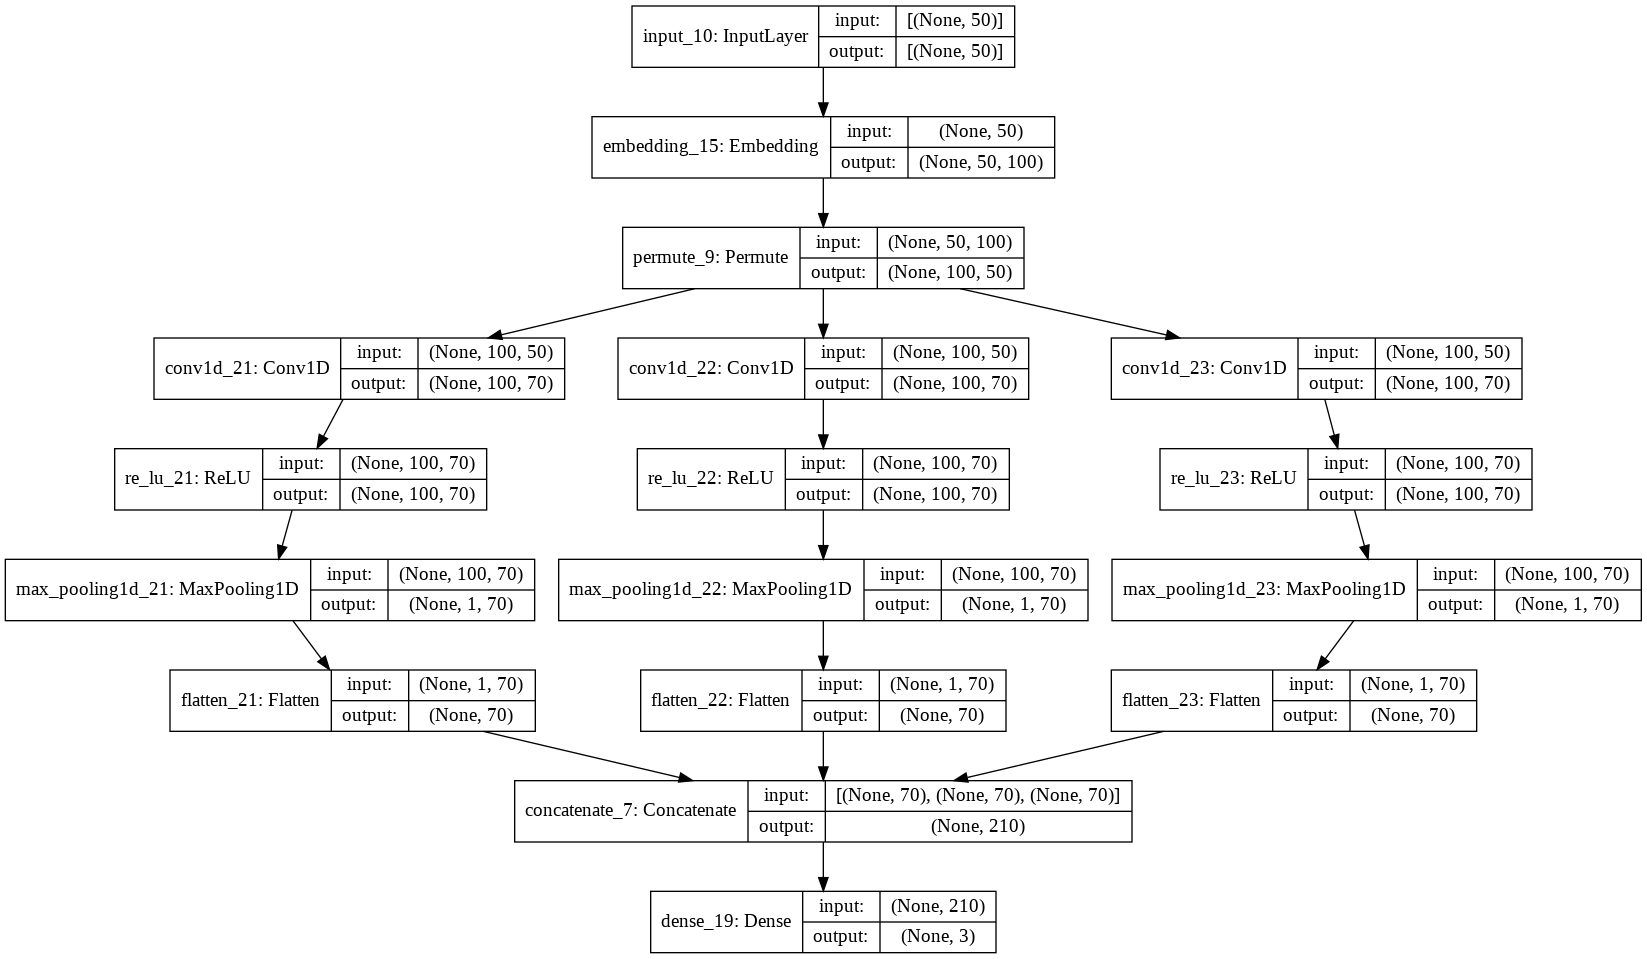

In [ ]:
tf.keras.utils.plot_model(CNN_model_inside_Embedding, "CNN.png", show_shapes=True)

### 2. Pre-trained Í∞ÄÏ†∏Îã§ Ïì∞Í∏∞

> LSTM Í∏∞Î≥∏ Î™®Îç∏

In [ ]:
from tqdm import tqdm_notebook

def load_pretrained_vectors(word2idx, fname):
    """Load pretrained vectors and create embedding layers.
    
    Args:
        word2idx (Dict): Vocabulary built from the corpus
        fname (str): Path to pretrained vector file

    Returns:
        embeddings (np.array): Embedding matrix with shape (N, d) where N is
            the size of word2idx and d is embedding dimension
    """

    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())

    # Initilize random embeddings
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))
    embeddings[word2idx['<pad>']] = np.zeros((d,))

    # Load pretrained vectors
    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")

    return embeddings

In [ ]:
word2idx

{'<pad>': 0,
 '<unk>': 1,
 'Ìù†': 2,
 '.': 3,
 'Ïùº': 4,
 'Îã®': 5,
 'Ï†Ñ': 6,
 'Ïïà': 7,
 'Îßû': 8,
 'ÏùÑ': 9,
 'Îûò': 10,
 'Ïöî': 11,
 'Ïù¥': 12,
 'Í∞ï': 13,
 'Ïù∏': 14,
 'ÏùÄ': 15,
 'Î∞¥': 16,
 'Ìà¨': 17,
 'Ìò∏': 18,
 'Ïóê': 19,
 'ÏÑú': 20,
 'Ìè¨': 21,
 'ÏßÄ': 22,
 'ÏÖò': 23,
 'Î≤§': 24,
 'Ïπò': 25,
 ',': 26,
 '\n': 27,
 'K': 28,
 'Î¶¨': 29,
 'Í±∞': 30,
 'Îäî': 31,
 'Ïõî': 32,
 'Îìú': 33,
 'Ïªµ': 34,
 'Í∞ô': 35,
 'ÌÅ∞': 36,
 'Î¨¥': 37,
 'ÎåÄ': 38,
 'Í≤Ω': 39,
 'ÏüÅ': 40,
 'Î†•': 41,
 'ÏóÜ': 42,
 'Ïñ¥': 43,
 'Ïßú': 44,
 'Ìîº': 45,
 'Îïå': 46,
 'Ìï¥': 47,
 'Ïô∏': 48,
 'Ìåå': 49,
 'Îã§': 50,
 'Ïì∞': 51,
 'Í≥†': 52,
 'ÎÇ®': 53,
 'Ïûê': 54,
 'Í∑º': 55,
 'Îç∞': 56,
 'ÏÑ†': 57,
 'Î∞î': 58,
 'Îãò': 59,
 'Ïä§': 60,
 'Ìäú': 61,
 'Îîî': 62,
 'Ïò§': 63,
 'ÏÇ¨': 64,
 'Ìïò': 65,
 'Ïã†': 66,
 'Í±¥': 67,
 'Í∞Ä': 68,
 'ÏòÅ': 69,
 '?': 70,
 'Ïú†': 71,
 'Î∏å': 72,
 'Îßå': 73,
 'Î≥¥': 74,
 'ÎÑò': 75,
 'Í∂Å': 76,
 'Í∏à': 77,
 'Ïó¨': 78,
 '„Ö†': 79,
 'Ï≤¥': 80,
 '„Öã': 81,
 'ÌÑ∞': 82,
 'Ïùò': 83,
 'ÏÑ∏':

In [ ]:
# Tok
# Load pretrained vectors
embeddings = load_pretrained_vectors(word2idx, '/content/drive/Shareddrives/[GH x Sandbox]/reference_data/cc.ko.300.vec')
#embeddings = torch.tensor(embeddings)

Loading pretrained vectors...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



There are 1949 / 2513 pretrained vectors found.


In [ ]:
embeddings.shape

(2513, 300)

In [ ]:
embeddings

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0212999 , -0.00745255, -0.2444739 , ...,  0.11583346,
        -0.12281369,  0.24556409],
       [-0.0277    , -0.1189    ,  0.0975    , ..., -0.1133    ,
         0.1857    ,  0.1988    ],
       ...,
       [ 0.08044983, -0.19484925, -0.18581012, ...,  0.1080426 ,
         0.06882753, -0.07296805],
       [-0.10975676, -0.12608504, -0.01761771, ...,  0.10337235,
        -0.23266059, -0.09654196],
       [ 0.0323    ,  0.0368    , -0.0038    , ..., -0.0564    ,
        -0.0235    , -0.0194    ]])

In [ ]:
LSTM_model_pretrained_Embedding = Sequential()
trained_embedding = Embedding(vocab_size, 300, weights=[embeddings], input_length=50, trainable=False)
LSTM_model_pretrained_Embedding.add(trained_embedding)
#LSTM_model_pretrained_Embedding.add(Embedding(vocab_size, 50)) #Ïó¨Í∏∞ÏÑú 30ÏùÄ Í∞Å Îã®Ïñ¥ ÎßàÎã§ 30Ï∞®ÏõêÏúºÎ°ú ÏûÑÎ≤†Îî© ÌïòÍ≤†Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏.
LSTM_model_pretrained_Embedding.add(LSTM(32))
LSTM_model_pretrained_Embedding.add(BatchNormalization())
LSTM_model_pretrained_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_pretrained_Embedding.add(Dense(3, activation = 'softmax'))# Ïó¨Í∏∞ÏÑú 3ÏùÄ ÏµúÏ¢Ö ÎùºÎ≤® Í∞ØÏàò
LSTM_model_pretrained_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_pretrained_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))
# ÌïôÏäµÏùÄ ÏïàÎê©ÎãàÎã§. „Öã

Epoch 1/30
275/275 - 6s - loss: 0.9255 - acc: 0.5750 - val_loss: 0.8642 - val_acc: 0.6336
Epoch 2/30
275/275 - 4s - loss: 0.8236 - acc: 0.6513 - val_loss: 0.9715 - val_acc: 0.5918
Epoch 3/30
275/275 - 4s - loss: 0.7828 - acc: 0.6736 - val_loss: 0.8135 - val_acc: 0.6486
Epoch 4/30
275/275 - 4s - loss: 0.7493 - acc: 0.6853 - val_loss: 0.7908 - val_acc: 0.6591
Epoch 5/30
275/275 - 4s - loss: 0.7197 - acc: 0.6969 - val_loss: 0.8421 - val_acc: 0.6323
Epoch 6/30
275/275 - 4s - loss: 0.6943 - acc: 0.7125 - val_loss: 0.8049 - val_acc: 0.6264
Epoch 7/30
275/275 - 4s - loss: 0.6753 - acc: 0.7222 - val_loss: 0.8478 - val_acc: 0.6359
Epoch 8/30
275/275 - 4s - loss: 0.6598 - acc: 0.7286 - val_loss: 0.7982 - val_acc: 0.6705
Epoch 9/30
275/275 - 4s - loss: 0.6405 - acc: 0.7359 - val_loss: 0.7748 - val_acc: 0.6709
Epoch 10/30
275/275 - 4s - loss: 0.6252 - acc: 0.7467 - val_loss: 0.8160 - val_acc: 0.6186
Epoch 11/30
275/275 - 4s - loss: 0.6077 - acc: 0.7497 - val_loss: 0.9151 - val_acc: 0.6318
Epoch 12

> CNN

In [ ]:
CNN_input = tf.keras.Input(shape = (50,))
trained_embedding = Embedding(vocab_size, 300, weights=[embeddings], input_length=50, trainable=False)
Embedded = trained_embedding(CNN_input)
Permuted = Permute(dims = (2,1))(Embedded)
CONV1 = Conv1D(filters = 100, kernel_size= 3, padding = 'same')(Permuted)
CONV1 = ReLU()(CONV1)
Pooled1 = MaxPool1D(CONV1.shape[1])(CONV1)
Flattened1 = Flatten()(Pooled1)


CONV2 = Conv1D(filters = 100, kernel_size= 4, padding = 'same')(Permuted)
CONV2 = ReLU()(CONV2)
Pooled2 = MaxPool1D(CONV2.shape[1])(CONV2)
Flattened2 = Flatten()(Pooled2)

CONV3 = Conv1D(filters = 100, kernel_size= 5, padding = 'same')(Permuted)
CONV3 = ReLU()(CONV3)
Pooled3 = MaxPool1D(CONV3.shape[1])(CONV3)
Flattened3 = Flatten()(Pooled3)

Merged = Concatenate()([Flattened1, Flattened2, Flattened3])
CNN_output = Dense(3)(Merged)

In [ ]:
CNN_model_inside_Embedding = tf.keras.Model(CNN_input, CNN_output)
CNN_model_inside_Embedding.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 50, 300)      753900      input_11[0][0]                   
__________________________________________________________________________________________________
permute_10 (Permute)            (None, 300, 50)      0           embedding_17[0][0]               
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 300, 100)     15100       permute_10[0][0]                 
____________________________________________________________________________________________

In [ ]:
CNN_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
CNN_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=10, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/10
275/275 - 7s - loss: 6.1462 - acc: 0.3480 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 2/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 3/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 4/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 5/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 6/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 7/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 8/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 9/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 10/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268


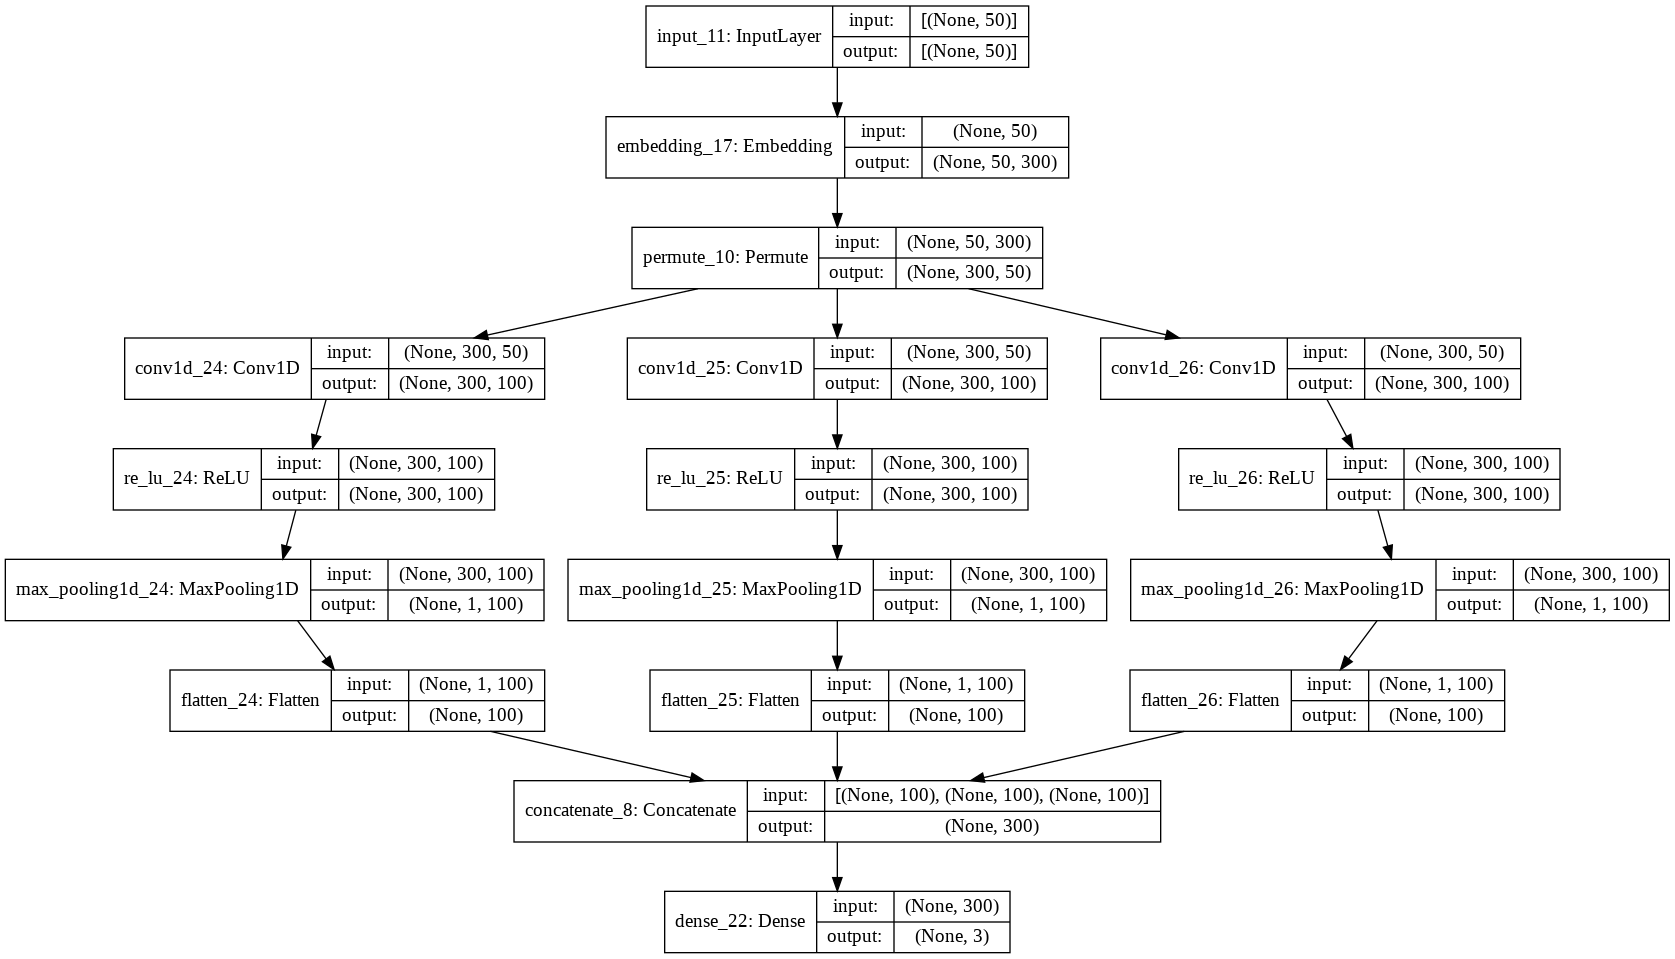

In [ ]:
tf.keras.utils.plot_model(CNN_model_inside_Embedding, "CNN.png", show_shapes=True)

### Fasttext ÏûÑÎ≤†Îî© ÌïôÏäµÏãúÌÇ§Í∏∞

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
data_DIR = "/content/drive/Shareddrives/[GH x Sandbox]/train/"
file_name_num = [4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,51]

files = [f for f in listdir(data_DIR) if isfile(join(data_DIR, f))]
video_stats = [f for f in files if '.csv' in f and 'video' in f]
files = [f for f in files if '.csv' in f and 'comments' in f]
print(files)

df_dict = dict()
for file_name in tqdm(files):
    comment_name = file_name.split('.')[0]
    df = pd.read_csv(data_DIR + file_name, lineterminator='\n')

    df_dict[comment_name] = df

FileNotFoundError: ignored

In [ ]:
whole_df = pd.DataFrame(columns=df_dict['comments_4'].columns)

for category, df in df_dict.items():
    df['category_id'] = int(category.split('_')[1])
    whole_df = pd.concat([whole_df, df], ignore_index=True)

whole_df.tail(10)

ch_id  ... category_id
1136000  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136001  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136002  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136003  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136004  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136005  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136006  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136007  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136008  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136009  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0

[10 rows x 10 columns]

In [ ]:
len(whole_df)

1136010

Fast Text Modeling


In [ ]:
from gensim.models import FastText

In [ ]:
whole_df['comment'][1136009]

'Ïû¨Ïõê Îãò Ïù¥Ï†ú Ïú†ÌäúÎ∏å Í∑∏ÎßåÌïòÏãúÍ≥† Ï†ëÏñ¥ Î≥¥ÎäîÍ≤å Ï¢ãÏùÑ Í±∞ Í∞ôÏïÑÏöî'

In [ ]:
def token_sentence(texts):
  max_len = 0
  tokenized_texts = []
  word2idx = {}
  # Add <pad> and <unk> tokens to the vocabulary
  word2idx['<pad>'] = 0
  word2idx['<unk>'] = 1
  # Building our vocab from the corpus starting from index 2
  idx = 2
  tokenized = []
  for j in range(len(texts)):
    tokenized.append(texts[j])
  
  

  return tokenized

In [ ]:
token_sentence("ÏïàÎÖï ÎÇòÎ•º ÏÜåÍ∞úÌïòÏßÄ ÎÇ¥ Ïù¥Î¶ÑÏùÄ Ïù¥ÌòÑÏäπ ÏßÅÏóÖÏùÄ")

['Ïïà',
 'ÎÖï',
 ' ',
 'ÎÇò',
 'Î•º',
 ' ',
 'ÏÜå',
 'Í∞ú',
 'Ìïò',
 'ÏßÄ',
 ' ',
 'ÎÇ¥',
 ' ',
 'Ïù¥',
 'Î¶Ñ',
 'ÏùÄ',
 ' ',
 'Ïù¥',
 'ÌòÑ',
 'Ïäπ',
 ' ',
 'ÏßÅ',
 'ÏóÖ',
 'ÏùÄ']

In [ ]:
token_sentence(["ÏïàÎÖïÎÇòÎäî Î∞îÎ≥¥Ïïº", "Ìï¥Ìîº Îç∞Ïù¥ ><"])

['ÏïàÎÖïÎÇòÎäî Î∞îÎ≥¥Ïïº', 'Ìï¥Ìîº Îç∞Ïù¥ ><']

In [ ]:
whole_comment_df = whole_df[['comment']]


In [ ]:
whole_comment_df

comment
0        ÏïÑÎãà Ï†ïÌïúÏù¥ ÏàôÏÜå Ï∞ΩÎ¨∏Ïóê xÏûê ÎåÄÎ¨∏ÏßùÎßåÌïòÍ≤å ÌÖåÏù¥ÌîÑ Î∂ôÏó¨ÎÜìÏùÄÍ±∞ K ÏïÑÏù¥Îèå - Ï∞ΩÎ¨∏Ïù¥Îùº...
1        ÏïÑÎãà Ïã¨ÏßÄÏñ¥ Í∑∏ Î∞© Ïú§Ï†ïÌïúÎ∞© Ï∞ΩÎ¨∏Ïù¥ ÏïÑÎãàÎùº Ïù¥ÏßÄÌõàÎ∞© Ï∞ΩÎ¨∏ÏïÑÎãò ? „Öã„Ñ≤„Öã„Ñ±„Öã„Ñ±„Öã„Öã„Öã„Ñ±...
2        Ïù¥Í±∞Ïù¥Í±∞ Ï°∞ÏÇ¨Î•º Ïó¥Ïã¨Ìûà ÌïòÏã†Í±¥ÏßÄ Ïù¥Í±∞ Ï∫êÎüøÏïÑÎãàÎ©¥ Ïù¥Î†áÍ≤å Ìï† ÏàòÍ∞Ä ÏóÜÎäîÎç∞..?Ïï†Îì§ ÏÑ†...
3        ÎØºÍ∑úÎûë Ï†ïÌïúÏù¥ ÎπÑÏ£ºÏñºÌï© Ï¢ãÏùÄÍ±∞ ÏïåÍ≥†ÏûàÏóàÏßÄÎßå Ïù¥Î†áÍ≤å Î≥¥ÎãàÍπå ÏßÑÏßúÏµúÍ≥†ÎÑ§„Ö†„Ö†„Ö†„Ö†„Ö† ÏõêÏö∞Îûë...
4             5:31 Ïù¥Îü¨Îã§Í∞Ä ÏÑúÎ™ÖÌò∏ ÎÇòÏ§ëÏóê Ï∫êÎüøÎì§ÏùÄ Ï†ïÎßê Ïú†ÎÇúÏä§Îü¨Ïö¥ Ï°¥Ïû¨ÏóêÏöî Ïù¥Îü¨Î©¥ Ïñ¥Îñ°Ìï®
...                                                    ...
1136005                                     ÍπÄÏû¨Ïõê ÎÇòÎ≥¥Îã§ Í≤êÏßÄ Î™ªÌïòÎÑ§
1136006  ÏûêÏÑ∏Ìûà Î≥¥Í∏∞Î•º ÎàÑÎ•¥ÏßÄÎßàÏÑ∏Ïöî\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1136007                                         ÎÇòÍµ¨ÎèÖÌïòÎ©¥ Ïó¨ÏπúÏÉùÍπÄ
1136008                             Ïû¨ÏõêÎãò Ìï≠ÏÉÅ Ïû¨ÎØ∏ÏûàÎäî ÏòÅÏÉÅ ÎßåÎì§Ïñ¥ Ï£ºÏÑ∏Ïöî
1136009                  Ïû¨Ïõê Îãò Ïù¥Ï†ú Ïú†ÌäúÎ∏å Í∑∏ÎßåÌïòÏãúÍ≥† Ï†ëÏñ¥ Î≥¥ÎäîÍ≤å Ï¢ãÏùÑ Í±∞ Í∞ôÏïÑÏöî

[1136010 rows x 1 columns]

In [ ]:
corpus = whole_comment_df.apply(lambda row : token_sentence(str(row['comment'])), axis=1)
corpus[:10]

0    [ÏïÑ, Îãà,  , Ï†ï, Ìïú, Ïù¥,  , Ïàô, ÏÜå,  , Ï∞Ω, Î¨∏, Ïóê,  , x, ...
1    [ÏïÑ, Îãà,  , Ïã¨, ÏßÄ, Ïñ¥,  , Í∑∏,  , Î∞©,  , Ïú§, Ï†ï, Ìïú, Î∞©, ...
2    [Ïù¥, Í±∞, Ïù¥, Í±∞,  , Ï°∞, ÏÇ¨, Î•º,  , Ïó¥, Ïã¨, Ìûà,  , Ìïò, Ïã†, ...
3    [ÎØº, Í∑ú, Îûë,  , Ï†ï, Ìïú, Ïù¥,  , ÎπÑ, Ï£º, Ïñº, Ìï©,  , Ï¢ã, ÏùÄ, ...
4    [5, :, 3, 1,  , Ïù¥, Îü¨, Îã§, Í∞Ä,  , ÏÑú, Î™Ö, Ìò∏,  , ÎÇò, ...
5    [ÍπÄ, ÎØº, Í∑ú, Í∞Ä,  , ÏÇ¥, ÏïÑ,  , ÏõÄ, ÏßÅ, Ïù∏, Îã§, Îäî, Í≤É, Ïóê, ...
6    [ÎÑà, Î¨¥,  , ÏõÉ, Ïñ¥, ÏÑú,  , Í¥ë, ÎåÄ, Í∞Ä,  , ÏïÑ, ÌîÑ, Îã§, ., ...
7    [Îã§, Îì§,  , Îäê, Íºà, Íµ¨, ÎÇò, ., ., .,  , Ïù¥,  , ÏòÅ, ÏÉÅ, ...
8    [Ï∫ê, Îüø, Îì§, üíé,  , Ï§å, ÌÑ∞, Î∑∞, Îøê, Îßå,  , ÏïÑ, Îãà, Îùº,  , ...
9    [Îîî, Ïóê, Ïûá,  , ÏÑπ, Ïãú, Ìï¥, .,  , ÎÇò,  , ÎØ∏, Ï≥ê,  , Ïñ¥, ...
dtype: object

In [ ]:
# Ïó¨Í∏∞ÏÑú Î™®Îç∏ÏùÑ Ï¢Ä Tuning Ìï† Ïàò ÏûàÏäµÎãàÎãπ!
model = FastText(size=100, window=3, min_count=10, workers=5, sg=1)
model.build_vocab(sentences=corpus)
model.train(
    sentences=corpus, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

In [ ]:
# save model
model_fDIR = "/content/drive/MyDrive/GH/SandBoxProject/"
model.save(model_fDIR + 'fasttext_eumjul_w3_m10')
model.wv.save_word2vec_format(model_fDIR + 'fasttext_eumjul_w3_m10_vis')

In [ ]:
print(model.wv)

In [ ]:
model.wv.vectors.shape

(3836, 100)

#### ÏûÑÎ≤†Îî© ÌÖåÏä§Ìä∏

In [ ]:
print((model.wv.most_similar(token_sentence('ÍøÄ'), topn=5)))

[('ÌåÅ', 0.6809545755386353), ('Ïûº', 0.6770281791687012), ('Ï†¨', 0.6062765717506409), ('üçØ', 0.5760533809661865), ('ÎÄ∞', 0.5527904033660889)]


#### ÌïôÏäµÎêú ÏûÑÎ≤†Îî© Î∂àÎü¨Ïò§Í∏∞ (Ïó¨Í∏∞Î∂ÄÌÑ∞ Î™®ÎìàÏóê ÎÑ£ÏùÑ Îïå Ï∞∏Í≥†ÌïòÎ©¥ Îê† Í±∞ Í∞ôÏïÑÏöî!)


In [ ]:
from gensim.models import KeyedVectors, FastText

In [ ]:
model_fname = "/content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/fasttext/fasttext_eumjul"
embedding_model = FastText.load(model_fname)

In [ ]:
embedding_model.wv.vectors.shape

(5663, 100)

In [ ]:
em

In [ ]:
embedding_model.wv.vocab

{'ÏïÑ': <gensim.models.keyedvectors.Vocab at 0x7f1954e23b50>,
 'Îãà': <gensim.models.keyedvectors.Vocab at 0x7f1954e23b10>,
 ' ': <gensim.models.keyedvectors.Vocab at 0x7f1954e23c50>,
 'Ï†ï': <gensim.models.keyedvectors.Vocab at 0x7f1954e23cd0>,
 'Ìïú': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ec10>,
 'Ïù¥': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ead0>,
 'Ïàô': <gensim.models.keyedvectors.Vocab at 0x7f1954e2eb50>,
 'ÏÜå': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ea90>,
 'Ï∞Ω': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ebd0>,
 'Î¨∏': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ecd0>,
 'Ïóê': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ed10>,
 'x': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e290>,
 'Ïûê': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e810>,
 'ÎåÄ': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e890>,
 'Ïßù': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ed90>,
 'Îßå': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e310>,
 'Ìïò': <gen

In [ ]:
embedding_model.wv.index2word.index('Ìûã')

ValueError: ignored

In [ ]:
embedding_model.wv.vectors('ÏïàÎÖïÌïòÏÑ∏Ïöî')

TypeError: ignored

In [ ]:
embedding_model.wv.vectors[1013]

array([-0.30530325,  0.19968723, -0.11163443, -0.1396638 ,  0.10069371,
        0.18994814, -0.3397554 ,  0.114188  ,  0.1621604 ,  0.14653426,
       -0.07593415,  0.12150709,  0.06730559, -0.20250212,  0.1736672 ,
       -0.13233522,  0.1160189 , -0.00336763,  0.20723255,  0.0786157 ,
        0.08253931, -0.13539076,  0.07899188,  0.21777172, -0.06046881,
       -0.03492628,  0.0095981 , -0.02268984,  0.13502578,  0.12077362,
        0.15018885,  0.02884118, -0.05255683, -0.183318  ,  0.22369534,
       -0.17409123,  0.26753238, -0.01084949,  0.2526945 ,  0.03261225,
        0.26917425,  0.12348884, -0.4890355 , -0.07588693, -0.01777693,
        0.39007646, -0.1908631 , -0.07258558, -0.01268908,  0.11220203,
        0.07497871,  0.15920672, -0.11521582,  0.22835703,  0.09263802,
       -0.21541692, -0.07168306,  0.05575279, -0.18363813, -0.13798636,
        0.12096624, -0.00120862,  0.16648743,  0.1392301 ,  0.0190138 ,
       -0.01413393,  0.20724823,  0.06221654,  0.06706505, -0.04

In [ ]:
embedding_model.wv.index2word[1013]

'Ìù†'

In [ ]:
embedding_model.wv.index2word.index('Ìù†')

1013

In [ ]:
embedding_model.wv.get_vector('Ìù†')

array([-0.30530325,  0.19968723, -0.11163443, -0.1396638 ,  0.10069371,
        0.18994814, -0.3397554 ,  0.114188  ,  0.1621604 ,  0.14653426,
       -0.07593415,  0.12150709,  0.06730559, -0.20250212,  0.1736672 ,
       -0.13233522,  0.1160189 , -0.00336763,  0.20723255,  0.0786157 ,
        0.08253931, -0.13539076,  0.07899188,  0.21777172, -0.06046881,
       -0.03492628,  0.0095981 , -0.02268984,  0.13502578,  0.12077362,
        0.15018885,  0.02884118, -0.05255683, -0.183318  ,  0.22369534,
       -0.17409123,  0.26753238, -0.01084949,  0.2526945 ,  0.03261225,
        0.26917425,  0.12348884, -0.4890355 , -0.07588693, -0.01777693,
        0.39007646, -0.1908631 , -0.07258558, -0.01268908,  0.11220203,
        0.07497871,  0.15920672, -0.11521582,  0.22835703,  0.09263802,
       -0.21541692, -0.07168306,  0.05575279, -0.18363813, -0.13798636,
        0.12096624, -0.00120862,  0.16648743,  0.1392301 ,  0.0190138 ,
       -0.01413393,  0.20724823,  0.06221654,  0.06706505, -0.04

In [ ]:
len(embedding_model.wv.index2word)  # Index Í∞Ä Ï¥ù 5663Í∞ú ÏûàÍ≥†, Í∞ÅÍ∞ÅÏóê ÎåÄÌï¥ÏÑú 100Ï∞®Ïõê ÏßúÎ¶¨ Î≤°ÌÑ∞Í∞Ä ÏûàÏùå

5663

#### ÌïôÏäµÏãúÌÇ® Fasttext ÏûÑÎ≤†Îî© Ïù¥Ïö©ÌïòÍ∏∞ 

In [ ]:
def sen_to_seq(s_list): # s = ['ÏïÑ', 'Îãà']
    seq = list()
    for s in s_list:
        try:
            seq_value = embedding_model.wv.index2word.index(s)+1
        except:
            seq_value = 0 # ÏóÜÏúºÎ©¥ 0
        seq.append(seq_value)
    return seq

In [ ]:
sen_to_seq(['ÏïÑ','Îãà'])

[11, 14]

In [ ]:
def seq_padding(seq, max_len):
    if len(seq) < max_len:
        n = max_len - len(seq)
        zero_list = [0] * n
        seq += zero_list
    elif len(seq) > max_len:
        seq = seq[:max_len] 
    
    return seq   

In [ ]:
max_len = max(len(l) for l in corpus)
max_len

NameError: ignored

In [ ]:
embedding_model.wv[corpus.iloc[0]].shape

(79, 100)

In [ ]:
len_distribution = [len(l) for l in corpus]

In [ ]:
np.mean(len_distribution)

39.41910810644273

In [ ]:
import matplotlib.pyplot as plt

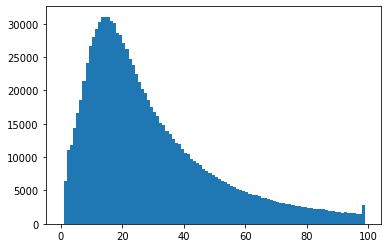

In [ ]:
len_distribution_array = np.array(len_distribution)

plt.hist(len_distribution_array, bins = np.arange(0,100,1))
plt.show()

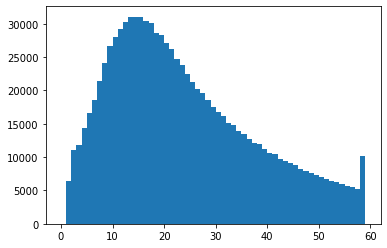

In [ ]:
plt.hist(len_distribution_array, bins = np.arange(0,60,1))
plt.show()

In [ ]:
sentence_len = 50 

Î¨∏Ïû• Í∏∏Ïù¥Î•º 50ÍπåÏßÄÎßå Î≥¥Í∏∞Î°ú Í≤∞Ï†ïÌñàÏäµÎãàÎã§!
Ïù¥Ï†ú embedding matrix Î•º ÎßåÎì≠ÎãàÎã§.

In [ ]:
embedding_matrix = np.zeros((embedding_model.wv.vectors.shape[0]+1, embedding_model.wv.vectors.shape[1]))
np.shape(embedding_matrix)   


(3837, 100)

In [ ]:
for i in tqdm(range(len(embedding_model.wv.vectors))):
    embedding_matrix[i+1] = embedding_model.wv.vectors[i]
    # 0Ïóê ÎåÄÌïú Í∞íÏùÄ -> 0ÌñâÎ†¨Î°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú index Ïóê +1 ÏùÑ Ìï¥Ï§çÎãàÎã§.

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3836/3836 [00:00<00:00, 344289.78it/s]


In [ ]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
embedding_matrix[5663]

IndexError: ignored

In [ ]:
embedding_model.wv.n_similarity('ÏïÑ ÏßÑÏßú Í∞úÎπ°ÏπòÎÑ§', 'Ïù¥Îü¥Í±∞Î©¥ Í±ç Î∞©ÏÜ°Ï†ëÏñ¥')

0.64313

In [ ]:
embedding_model.wv.n_similarity('ÏïÑ ÏßÑÏßú Í∞úÎπ°ÏπòÎÑ§', 'Ïñ∏Îãà ÎÑàÎ¨¥ ÏòàÎªêÏöî')

0.61258745

In [ ]:
token_sentence('Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî')

['Ìù†', '.', '.', ' ', 'Ïùº', 'Îã®', ' ', 'Ï†Ñ', ' ', 'Ïïà', 'Îßû', 'ÏùÑ', 'Îûò', 'Ïöî']

In [ ]:
embedding_model.wv.get_vector(',')

array([ 0.04151495, -0.0502139 , -0.09488994,  0.02851121,  0.20007153,
        0.08247532, -0.04942813, -0.04638997,  0.11166716,  0.09268869,
       -0.03043532, -0.02966953,  0.01986593,  0.1729537 , -0.11460082,
        0.05747357,  0.04532105,  0.0218615 ,  0.16682331, -0.067115  ,
        0.01631936,  0.11866426, -0.08496214,  0.21576464, -0.1149644 ,
        0.09657934,  0.00219459, -0.04424432,  0.32723632,  0.15318158,
        0.32439983, -0.13504249, -0.05627093,  0.04001839, -0.01446279,
       -0.2962282 ,  0.33791244, -0.03326362,  0.04049373,  0.00950088,
       -0.03569169, -0.1004917 , -0.15064988,  0.13691275,  0.36932656,
        0.1707112 , -0.04639302,  0.24765217,  0.0448998 ,  0.09447505,
       -0.04396485,  0.07038596,  0.0599113 ,  0.2638981 , -0.18983775,
       -0.15162997,  0.04430728, -0.2645467 ,  0.11424933, -0.25056255,
        0.2375732 , -0.02301529, -0.09413183, -0.05796941, -0.09554956,
        0.03704623,  0.06161044, -0.14052631, -0.08767715,  0.02

In [ ]:
embedding_model.wv.
embedding_model.wv.get_normed_vectors('Îã§ Í∞ÄÏ°åÎÑ§')

AttributeError: ignored

In [ ]:
embedding_model.wv.get_vector('Îã§ ')

KeyError: ignored

In [ ]:
embedding_model.wv.get_vector('Îã§')

array([ 0.01099458,  0.01133343, -0.04859336,  0.05378448,  0.09905023,
       -0.22136782, -0.01867678, -0.02092658,  0.15843976,  0.24386531,
       -0.084081  , -0.01187846,  0.06753061, -0.07783497,  0.00714025,
        0.01247447,  0.02394754,  0.0301309 ,  0.09403843,  0.05393561,
       -0.08082715,  0.1807813 ,  0.01511216,  0.04069639, -0.2108651 ,
        0.05851185,  0.21062182,  0.04064609,  0.10825792,  0.01928937,
        0.07616147, -0.02510464, -0.20532405, -0.10830589, -0.02110719,
       -0.18271123,  0.03013087,  0.03574935,  0.09382389, -0.04457073,
        0.04557103,  0.10906893,  0.14036524,  0.07626843,  0.13193476,
        0.10035387, -0.01044245,  0.06559747,  0.21536447, -0.2768241 ,
       -0.02308984, -0.08460761, -0.16697103,  0.06261732,  0.04670713,
       -0.06140271,  0.12480691,  0.07804147,  0.00091492,  0.10912845,
       -0.03240229, -0.06161935,  0.0791702 ,  0.17394997,  0.18457356,
       -0.08367179,  0.05210605, -0.02190749,  0.13473785, -0.07

In [ ]:
embedding_model.wv.get_vector('Í∞ÄÏ°åÎÑ§')

KeyError: ignored

In [ ]:
embedding_model.wv.get_vector('Í∞ÄÏ°å')

KeyError: ignored

In [ ]:
# FasttextÏùò ÏûÑÎ≤†Îî© MatrixÏôÄ ÎåÄÏùëÏãúÏºú Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú encoding Î∞©Î≤ïÏùÑ ÏÉàÎ°ú Ï†ïÏùò Ìï¥ Ï§çÎãàÎã§.
X_data_new_encode = np.zeros((22000, 50))
np.shape(X_data_new_encode)

(22000, 50)

In [ ]:
sen_to_seq(tokenized_texts[3000])

[320,
 273,
 36,
 255,
 43,
 101,
 32,
 278,
 70,
 58,
 69,
 290,
 30,
 12,
 54,
 114,
 1468,
 220,
 4,
 145,
 50,
 396,
 17,
 525,
 553,
 30,
 973,
 256,
 3,
 3,
 3,
 216,
 216,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
X_data_new_encode[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
len(tokenized_texts)

22000

In [ ]:
for i in range(len(X_data_new_encode)):
  X_data_new_encode[i] = seq_padding(sen_to_seq(tokenized_texts[i]),sentence_len)


In [ ]:
X_data_new_encode    # encoding Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!

array([[1014.,    3.,    3., ...,    0.,    0.,    0.],
       [  49.,   63.,   55., ...,    0.,    0.,    0.],
       [  49.,   63.,  127., ...,  123.,    7.,    3.],
       ...,
       [   4.,   34.,  235., ...,    0.,    0.,    0.],
       [  11.,   14.,   48., ...,   57.,  278.,    5.],
       [ 334.,  308.,   61., ...,    0.,    0.,    0.]])

In [ ]:
X_data # Ìù†Ïù¥ 1014Î°ú encoding Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. 
# (ÏïÑÎûòÏóêÏÑú embedding_matrx[1014] = embedding_model.wv.get_vector('Ìù†')) Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 1ÎåÄ1 Îß§Ïπ≠Ïù¥ Ïûò Ïù¥Î£®Ïñ¥ Ï°åÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

0                                           Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî
1                                          0:18 KITA Ï±Ö „Öã„Öã„Öã
2        0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...
3                                                Íº¨..Íº¨ÎÅºÏò§..?
4                        ÎÇú Îπ®ÎûêÎã§Î•º 'Î∞úÎ†∏Îã§'Î°ú Î¥§ÎÑ§„Öã„Öã„ÖãÏûòÎ™ªÎ≥¥Í≥† Ï†ïÎßêÎÇ¥ÎÇ¥ Ï∂ïÍµ¨Ïù∏Ï§Ñ
                               ...                        
21995                            Í∑∏ÎÇ®Îì§ Îä•ÏßÄ ÏàòÏ§ÄÏù¥ Ïñ¥ÎîîÍπåÏßÄ ÎÇÆÏïÑÏßÑÍ±∞ÏûÑ ...
21996    ÏßÄÍ∏àÏùÄ 21ÏÑ∏Í∏∞Ïù¥Í≥† Ï∂©Î∂ÑÌûà Î¨∏Î™ÖÏù¥ Î∞úÎã¨ÌïòÏòÄÏäµÎãàÎã§. Í∞ú ÎßêÍ≥†ÎèÑ Í∞úÎ•º ÎåÄÏ≤¥Ìï† Ïàò ÏûàÎäî ...
21997                                 Ïù¥Í≤å Î®∏ÎùºÍ≥† Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄÍ±∞ÎÉê?„Öã„Öã„Öã
21998    ÏïÑÎãà ÏßÑÏßú.......Ïñ¥Ïù¥ÏóÜÎã§... ÏßÑÏßú ÏïΩÏÜç ÌïòÎÇò ÏïàÏßÄÌÇ§Í≥† Ï¥¨ÏòÅÏùÑ Ìï¥? ÏïÑÎãà Í∑∏Í±∏...
21999                      ÏÉàÏóÑÎßàÎûë ÎèôÏÉùÏùÄ Î¨¥Ïä® Ïû¨Ïó∞Î∞∞Ïö∞ ÏàòÏ§ÄÎèÑ ÏïàÎêò

In [ ]:
embedding_model.wv.get_vector('Ìù†')

array([-0.08330018,  0.25878412,  0.33798054,  0.4654209 ,  0.06186555,
        0.15396865,  0.13220288,  0.11686262, -0.0381371 ,  0.06398079,
       -0.01762538, -0.08571518,  0.0414757 ,  0.03586491,  0.03457904,
        0.31080538, -0.11847334, -0.04054627, -0.03523864, -0.03654143,
       -0.08033282, -0.01056937,  0.10272004,  0.01707923,  0.30124816,
       -0.34151617, -0.09563851, -0.20126249, -0.10657863, -0.15751469,
        0.26647836, -0.12245115,  0.2570662 , -0.00839353,  0.20265986,
       -0.175378  ,  0.34684148, -0.08333167, -0.15309574, -0.00122593,
       -0.00206008, -0.20342557, -0.1541804 , -0.09092611,  0.03244535,
        0.13906242,  0.22813675,  0.23300517,  0.10916039,  0.08954616,
        0.01605823,  0.1176705 ,  0.08514202, -0.04662961, -0.10492126,
       -0.46777037,  0.4440345 ,  0.05389031, -0.09458698,  0.10641974,
        0.20712553,  0.06783956,  0.0658664 , -0.12049386, -0.09987499,
        0.03160217, -0.05286325, -0.23984578, -0.16015504, -0.01

In [ ]:
embedding_matrix[1014]

array([-0.08330018,  0.25878412,  0.33798054,  0.4654209 ,  0.06186555,
        0.15396865,  0.13220288,  0.11686262, -0.0381371 ,  0.06398079,
       -0.01762538, -0.08571518,  0.0414757 ,  0.03586491,  0.03457904,
        0.31080538, -0.11847334, -0.04054627, -0.03523864, -0.03654143,
       -0.08033282, -0.01056937,  0.10272004,  0.01707923,  0.30124816,
       -0.34151617, -0.09563851, -0.20126249, -0.10657863, -0.15751469,
        0.26647836, -0.12245115,  0.25706619, -0.00839353,  0.20265986,
       -0.17537799,  0.34684148, -0.08333167, -0.15309574, -0.00122593,
       -0.00206008, -0.20342557, -0.15418039, -0.09092611,  0.03244535,
        0.13906242,  0.22813675,  0.23300517,  0.10916039,  0.08954616,
        0.01605823,  0.1176705 ,  0.08514202, -0.04662961, -0.10492126,
       -0.46777037,  0.44403449,  0.05389031, -0.09458698,  0.10641974,
        0.20712553,  0.06783956,  0.0658664 , -0.12049386, -0.09987499,
        0.03160217, -0.05286325, -0.23984578, -0.16015504, -0.01

In [ ]:
X_data_new_encode = np.asarray(X_data_new_encode).astype('int32')

In [ ]:
len(embedding_matrix[2])

100

In [ ]:
Y_label

0        0
1        0
2        0
3        0
4        0
        ..
21995    2
21996    2
21997    2
21998    2
21999    2
Name: class, Length: 22000, dtype: int64

> LSTM Í∏∞Î≥∏ Î™®Îç∏

In [ ]:
import tensorflow as tf
Y_label_encode = tf.keras.utils.to_categorical(Y_label, num_classes = 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_Youtube, X_Val_Youtube, Y_train_Youtube, Y_Val_Youtube = train_test_split(X_data_new_encode, Y_label_encode, test_size=0.20, random_state=33)  # ÏïåÎßûÍ≤å encoding Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£ÏäµÎãàÎã§.

In [ ]:
X_data_new_encode = np.asarray(X_data_new_encode).astype('float32')

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
LSTM_model_pretrained_Embedding = Sequential()
trained_embedding = Embedding(3837, 100, weights=[embedding_matrix], input_length=100, trainable=False)   # ÏúÑÏóêÏÑú ÏßÅÏ†ë Íµ¨Ìïú embedding_matrixÎ•º ÎÑ£Ïñ¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
LSTM_model_pretrained_Embedding.add(trained_embedding)
#LSTM_model_pretrained_Embedding.add(Embedding(vocab_size, 50)) #Ïó¨Í∏∞ÏÑú 50ÏùÄ Í∞Å Îã®Ïñ¥ ÎßàÎã§ 30Ï∞®ÏõêÏúºÎ°ú ÏûÑÎ≤†Îî© ÌïòÍ≤†Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏.
LSTM_model_pretrained_Embedding.add(LSTM(64, return_sequences = True))
LSTM_model_pretrained_Embedding.add(LSTM(32, return_sequences = False))
#LSTM_model_pretrained_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_pretrained_Embedding.add(Dense(3, activation = 'softmax'))# Ïó¨Í∏∞ÏÑú 3ÏùÄ ÏµúÏ¢Ö ÎùºÎ≤® Í∞ØÏàò
LSTM_model_pretrained_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_pretrained_Embedding.summary()
# ÌïôÏäµÏù¥ Ïûò ÏïàÎêòÎÑ§Ïöî „Ö†„Ö†

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          383700    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 64)           42240     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 438,455
Trainable params: 54,755
Non-trainable params: 383,700
_________________________________________________________________


In [ ]:
LSTM_model_pretrained_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=50, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/50
550/550 - 8s - loss: 0.8191 - acc: 0.6471 - val_loss: 0.7457 - val_acc: 0.6939
Epoch 2/50
550/550 - 4s - loss: 0.7506 - acc: 0.6828 - val_loss: 0.7241 - val_acc: 0.6932
Epoch 3/50
550/550 - 4s - loss: 0.7315 - acc: 0.6898 - val_loss: 0.7090 - val_acc: 0.7043
Epoch 4/50
550/550 - 4s - loss: 0.7165 - acc: 0.6982 - val_loss: 0.7314 - val_acc: 0.6889
Epoch 5/50
550/550 - 4s - loss: 0.7078 - acc: 0.7009 - val_loss: 0.7129 - val_acc: 0.6986
Epoch 6/50
550/550 - 4s - loss: 0.6960 - acc: 0.7080 - val_loss: 0.7079 - val_acc: 0.7020
Epoch 7/50
550/550 - 4s - loss: 0.6898 - acc: 0.7108 - val_loss: 0.7121 - val_acc: 0.6995
Epoch 8/50
550/550 - 4s - loss: 0.6812 - acc: 0.7165 - val_loss: 0.6982 - val_acc: 0.7061
Epoch 9/50
550/550 - 4s - loss: 0.6692 - acc: 0.7241 - val_loss: 0.7064 - val_acc: 0.7032
Epoch 10/50
550/550 - 4s - loss: 0.6619 - acc: 0.7260 - val_loss: 0.7016 - val_acc: 0.7018
Epoch 11/50
550/550 - 4s - loss: 0.6532 - acc: 0.7281 - val_loss: 0.7143 - val_acc: 0.6932
Epoch 12